# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./dataset.csv')

Show some information and statistics about the dataset

In [3]:
df.shape

(2312, 15)

In [4]:
df.head()

,REF,Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Continent_company,Sub-region_company,Continent_origin,Sub-region_origin,Manufacturer,Company
0,2454.0,U.S.A.,2019.0,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,Americas,Northern America,Africa,Sub-Saharan Africa,5150,5150
1,2458.0,U.S.A.,2019.0,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,Americas,Northern America,Americas,Latin America and the Caribbean,5150,5150
2,2454.0,U.S.A.,2019.0,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,Americas,Northern America,Africa,Sub-Saharan Africa,5150,5150
3,797.0,France,2012.0,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75,Europe,Western Europe,Americas,Latin America and the Caribbean,A. Morin,A. Morin
4,797.0,France,2012.0,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50,Europe,Western Europe,Americas,Latin America and the Caribbean,A. Morin,A. Morin


In [5]:
df.columns

Index(['REF', 'Company Location', 'Review Date', 'Country of Bean Origin',
       'Specific Bean Origin or Bar Name', 'Cocoa Percent', 'Ingredients',
       'Most Memorable Characteristics', 'Rating', 'Continent_company',
       'Sub-region_company', 'Continent_origin', 'Sub-region_origin',
       'Manufacturer', 'Company'],
      dtype='object')

In [6]:
df.describe(include='all')

,REF,Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Continent_company,Sub-region_company,Continent_origin,Sub-region_origin,Manufacturer,Company
count,2312.000000,2312,2312.000000,2312,2312,2312.000000,2224,2312,2312.000000,2312,2312,2312,2312,2312,2312
unique,NaN,63,NaN,56,1436,NaN,21,2270,NaN,5,13,5,10,493,527
top,NaN,U.S.A.,NaN,Venezuela,Madagascar,NaN,"3- B,S,C","creamy, nutty, cocoa",NaN,Americas,Northern America,Americas,Latin America and the Caribbean,Soma,Soma
freq,NaN,966,NaN,245,55,NaN,885,4,NaN,1369,1127,1602,1572,52,52
mean,1317.821367,NaN,2013.760813,NaN,NaN,71.647708,NaN,NaN,3.184083,NaN,NaN,NaN,NaN,NaN,NaN
std,695.425750,NaN,3.591105,NaN,NaN,5.765289,NaN,NaN,0.451961,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,NaN,2006.000000,NaN,NaN,42.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,741.000000,NaN,2011.000000,NaN,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1351.000000,NaN,2014.000000,NaN,NaN,70.000000,NaN,NaN,3.250000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1912.000000,NaN,2016.000000,NaN,NaN,75.000000,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,NaN,NaN


## Data Exploration

### Rating distribution

In [7]:
df['Rating'].describe()

count    2312.000000
mean        3.184083
std         0.451961
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: Rating, dtype: float64

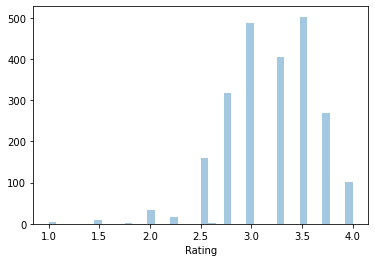

In [8]:
sns.distplot(df['Rating'], kde=False);

Let's plot a correlation matrix to check whether the rating is correlated to any numerical variable.

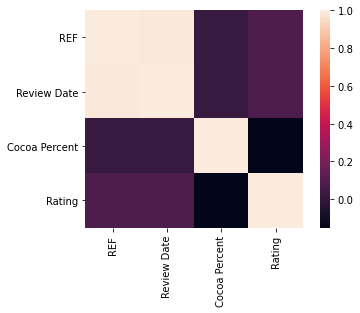

In [9]:
corrmat = df.corr()
sns.heatmap(corrmat, square=True);

It looks like Rating is not correlated to any of them.

However this plot confirms, as we expected from the dataset description, that REF is correlated with Review Date.

---

### Which companies are the top rated?

Let's see how the ratings change among different companies. We create a pivot table which tells us, for each company, the average rating and the number of reviews.

In [10]:
pivot_companies = pd.pivot_table(df, values='Rating', 
                                 index='Company',  
                                 aggfunc=[np.mean, len])
pivot_companies.head()

,mean,len
,Rating,Rating
Company,,
5150,3.5000,3.0
A. Morin,3.4000,25.0
AMMA,3.5000,5.0
Acalli,3.5625,4.0
Adi aka Fijiana,3.2500,4.0


Let's show the top 10 companies for average rating which have more than 10 reviews.

In [11]:
pivot_companies[pivot_companies[('len', 'Rating')]>10].sort_values(('mean', 'Rating'), ascending=False).head(10)

,mean,len
,Rating,Rating
Company,,
Soma,3.591346,52.0
Brasstown aka It's Chocolate,3.583333,12.0
Heirloom Cacao Preservation,3.545455,11.0
Ritual,3.541667,12.0
Arete,3.531250,32.0
"Smooth Chocolator, The",3.514706,17.0
Domori,3.500000,23.0
Bonnat,3.456897,29.0


Now let's see which are the 40 most reviewed companies and plot the corresponding rating distribution.

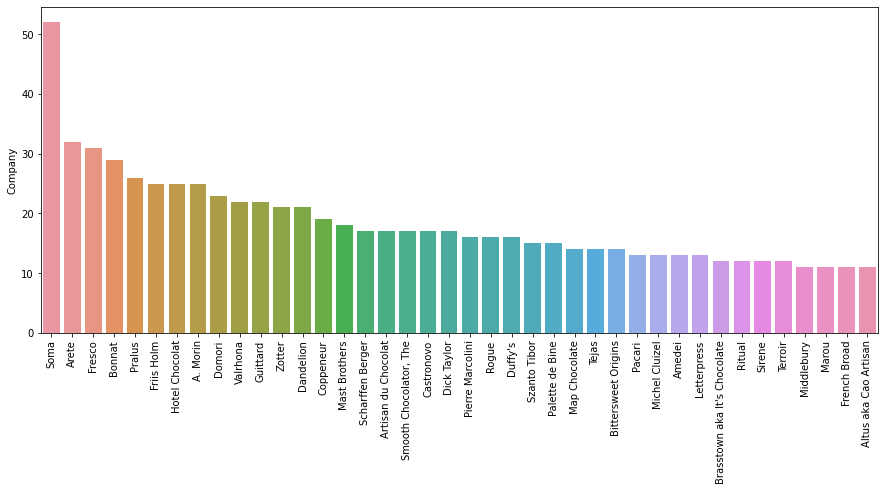

In [12]:
values = df['Company'].value_counts()[:40]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

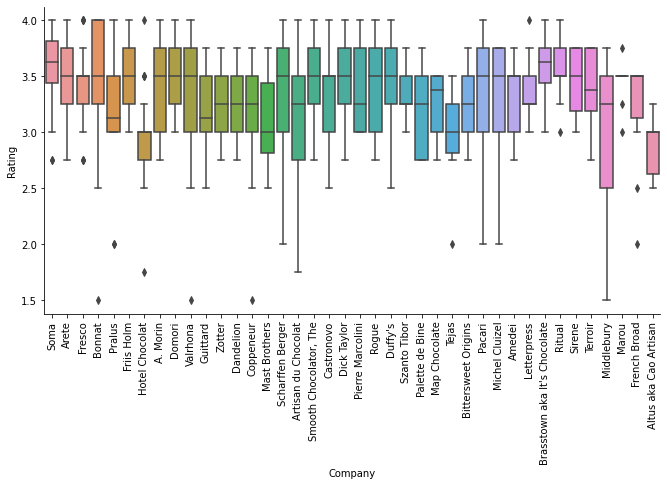

In [13]:
most_freq = df['Company'].value_counts()[:40].index
sns.catplot(x="Company", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Company'].isin(most_freq)])
plt.xticks(rotation=90);

### Where are most companies located?

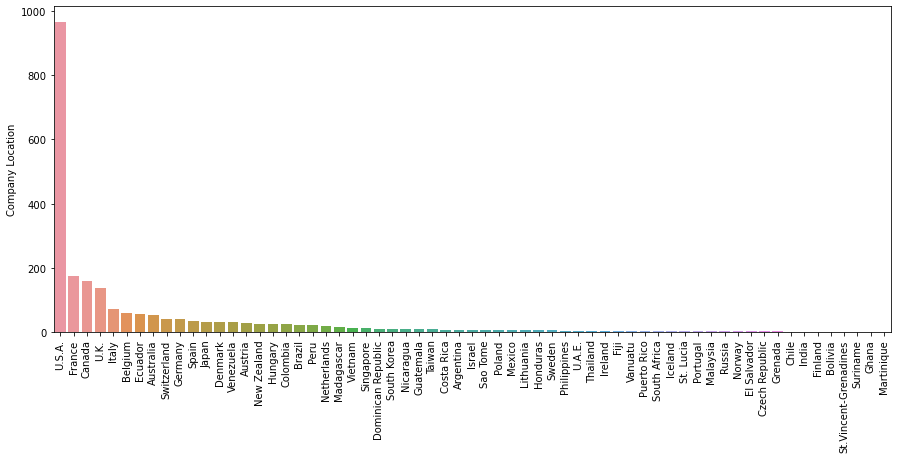

In [14]:
values = df['Company Location'].value_counts()
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

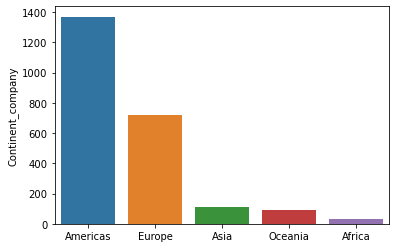

In [15]:
values = df['Continent_company'].value_counts()
sns.barplot(x=values.index, y=values);

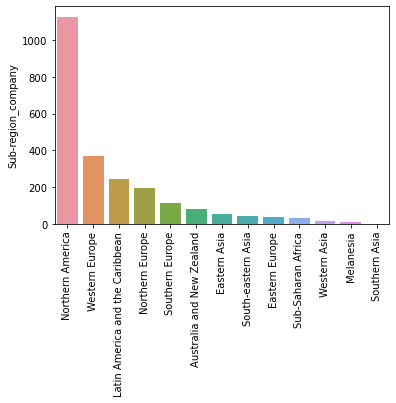

In [16]:
values = df['Sub-region_company'].value_counts()
fig, ax = plt.subplots()
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

We see that most of the bars reviewed are produced by U.S. companies, and about half of them are produced in Northern America.

Let's now check the rating of different locations. We create a pivot table where, for each location, we calculate the average rating, the number of reviews and the number of distinct companies.

In [17]:
def num_companies(data):
    return data.nunique()

pivot_locations = pd.pivot_table(df, values=['Rating', 'Company'], 
                                 index='Company Location',  
                                 aggfunc={'Rating':[np.mean, len],
                                          'Company':num_companies})
pivot_locations.head()

Company Rating          
                 num_companies    len      mean
Company Location                               
Argentina                    2    9.0  3.305556
Australia                   12   53.0  3.358491
Austria                      3   30.0  3.258333
Belgium                     14   59.0  3.105932
Bolivia                      1    2.0  3.250000

Here are the top 10 company locations for average rating:

In [18]:
pivot_locations[pivot_locations[('Rating', 'len')]>10].sort_values(('Rating', 'mean'), ascending=False).head(10)

Company Rating          
                 num_companies    len      mean
Company Location                               
Australia                   12   53.0  3.358491
Denmark                      3   31.0  3.338710
Vietnam                      4   15.0  3.333333
Switzerland                 10   43.0  3.313953
Canada                      31  161.0  3.301242
Brazil                      10   24.0  3.281250
Spain                        8   36.0  3.263889
Austria                      3   30.0  3.258333
France                      25  175.0  3.250000
Netherlands                  6   20.0  3.237500

Let's plot the distribution of ratings in the 40 most reviewed company locations.

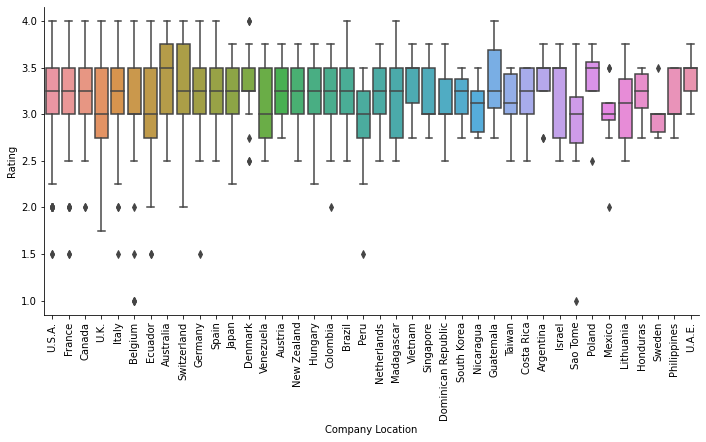

In [19]:
most_freq = df['Company Location'].value_counts()[:40].index
sns.catplot(x="Company Location", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Company Location'].isin(most_freq)])
plt.xticks(rotation=90);

### Country of origin

Let's see where the chocolate beans of the reviewed bars come from.

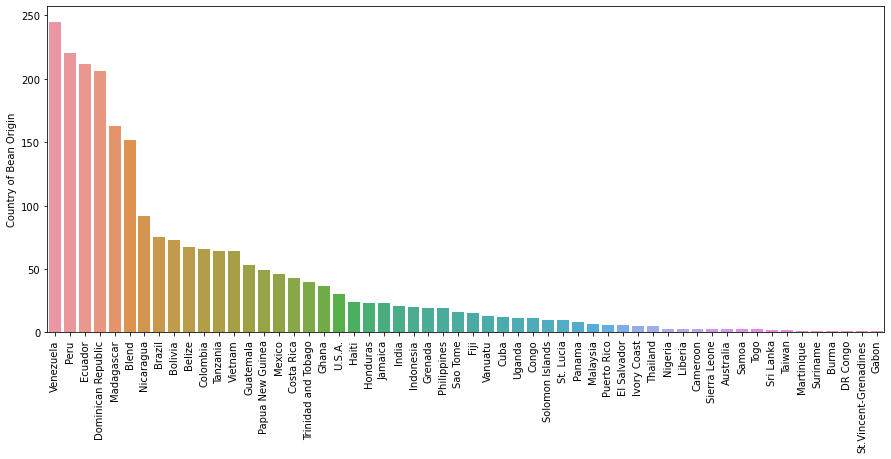

In [20]:
values = df['Country of Bean Origin'].value_counts()
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

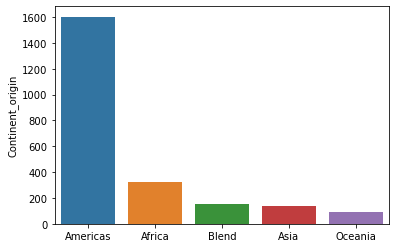

In [21]:
values = df['Continent_origin'].value_counts()
sns.barplot(x=values.index, y=values);

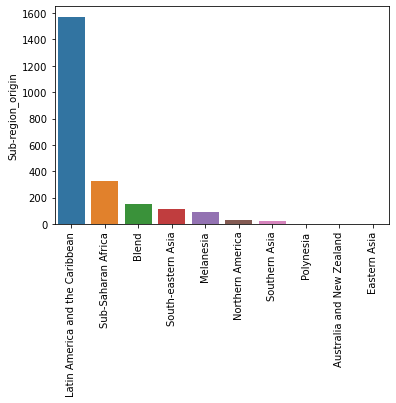

In [22]:
values = df['Sub-region_origin'].value_counts()
fig, ax = plt.subplots()
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

Let's now check the rating of different locations. We create a pivot table where, for each location, we calculate the average rating, the number of reviews and the number of distinct companies.

In [23]:
pivot_origin = pd.pivot_table(df, values=['Rating', 'Company'], 
                                 index='Country of Bean Origin',  
                                 aggfunc={'Rating':[np.mean, len],
                                          'Company':num_companies})
pivot_origin.head()

Company Rating          
                       num_companies    len      mean
Country of Bean Origin                               
Australia                          2    3.0  3.250000
Belize                            58   67.0  3.227612
Blend                             70  152.0  3.034539
Bolivia                           55   73.0  3.181507
Brazil                            51   75.0  3.253333

Here are the top 10 countries of bean origin for average rating:

In [24]:
pivot_origin[pivot_origin[('Rating', 'len')]>10].sort_values(('Rating', 'mean'), ascending=False).head(10)

Company Rating          
                       num_companies    len      mean
Country of Bean Origin                               
Congo                              9   11.0  3.318182
Cuba                              10   12.0  3.291667
Guatemala                         40   53.0  3.273585
Haiti                             22   24.0  3.270833
Papua New Guinea                  39   49.0  3.270408
Madagascar                       119  163.0  3.260736
Vietnam                           47   64.0  3.253906
Brazil                            51   75.0  3.253333
Nicaragua                         47   92.0  3.239130
Trinidad and Tobago               36   40.0  3.237500

Plot distribution of rating of most frequent countries of origin.

In [ ]:
most_freq = df['Country of Bean Origin'].value_counts()[:40].index
sns.catplot(x="Country of Bean Origin", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Country of Bean Origin'].isin(most_freq)])
plt.xticks(rotation=90);

Plot distribution of rating of most frequent continents of origin.

In [ ]:
sns.catplot(x="Continent_origin", y="Rating", 
            kind="box", 
            data=df)
plt.xticks(rotation=90);

Plot distribution of rating of most frequent sub-regions of origin.

In [ ]:
sns.catplot(x="Sub-region_origin", y="Rating", 
            kind="box", 
            data=df)
plt.xticks(rotation=90);

Some bars use beans of different origins and are denoted by "blend". Let's compare the rating of blend and non-blend bars.

In [ ]:
df['isBlend'] = (df['Country of Bean Origin'] == 'Blend')+0

In [ ]:
sns.catplot(x="isBlend", y="Rating", 
            kind="box", 
            data=df)
plt.xticks(rotation=90);

### Ingredients

From http://flavorsofcacao.com:

> "#" = represents the number of ingredients in the chocolate; B = Beans, S = Sugar, S* = Sweetener other than white cane or beet sugar, C = Cocoa Butter, V = Vanilla, L = Lecithin, Sa = Salt

For each of the above ingredients, let's create a column which indicates whether that ingredient is used or not.

In [ ]:
# Remove numbers, dashes and spaces
df['Ingredients'] = df['Ingredients'].str.replace('[\s\d-]', '')

ingredient_dummies = df['Ingredients'].str.get_dummies(sep=',')
ingredient_dummies.columns = ['Ingredient_beans', 'Ingredient_cocoabutter', 'Ingredient_lecithin', 
                              'Ingredient_sugar', 'Ingredient_sweetener', 'Ingredient_salt', 
                              'Ingredient_vanilla']
ingredient_dummies.head()

Let's plot for each ingredient the number of bars that contain it.

In [ ]:
values = ingredient_dummies.sum()
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

Note that some values of the ingredient column are missing and the corresponding dummies are all 0:

In [ ]:
ingredient_dummies[df.isna().any(axis=1)].head()

We replace these missing values by the mean of the corresponding dummy variable.

In [ ]:
ingr_means = ingredient_dummies.drop(ingredient_dummies[df.isna().any(axis=1)].index).mean()
ingredient_dummies[df.isna().any(axis=1)] += ingr_means

### Most Memorable Characteristics

From http://flavorsofcacao.com:

> Most Memorable Characteristics column is a summary review of the most memorable characteristics of that bar. Terms generally relate to anything from texture, flavor, overall opinion, etc.

Some more insights about such characteristics can be found at http://flavorsofcacao.com/review_guide.html. Here we list some of the most frequent terms (especially those related to flavor, since it is the most influential component in ratings) and we check which reviews contain them.

In [ ]:
characteristics_list = ['nutty', 'fruit', 'floral', 'spicy', 'cocoa', 'earthy', 
                        'sweet', 'sour', 'roasty', 'dairy', 'grass', 'pungent', 
                        'dirty', 'musty', 'smokey', 'rubbery', 'hammy', 'bland', 
                        'off', 'bitter', 'astringent']

In [ ]:
def contains(w):
    return df['Most Memorable Characteristics'].str.contains(w) + 0

for ch in characteristics_list:
    df[ch] = contains(ch)

In [ ]:
values = df[characteristics_list].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

# Save dataset

We apply some preliminary transformations to the dataset before saving it.

In [ ]:
# Drop REF since it is highly correlated with review date
# Drop Ingredients, Most Memorable Characteristics since we already encoded them
# Drop isBlend because we will get the same column with one hot encoding
df_trans = df.drop(['REF', 'Ingredients', 'Most Memorable Characteristics', 'isBlend'], axis=1)

# Add ingredient dummies
df_trans = pd.concat([df_trans, ingredient_dummies], axis=1)

# Drop Ingredient_beans, Ingredient_sugar since they are almost constant
df_trans = df_trans.drop(['Ingredient_beans', 'Ingredient_sugar'], axis=1)

In [ ]:
df_trans.to_csv('./data_prepared.csv', index=False)